##PROYECTO DATA SCIENCE MÓDULO 1
##COMISIÓN 61170
##PROFESOR: GUSTAVO BENITEZ
AUTOR: PABLO PIFFER

##Introducción

Como profesional de la salud mental, considero al análisis del presente dataset de suma importancia debido a la creciente preocupación mundial por el bienestar psicológico. Este conjunto de datos, que registra variables como el género, país, ocupación, nivel de estrés, cambios en los hábitos de sueño, historial de salud mental y tratamiento recibido, ofrece una visión integral de las tendencias globales en salud mental. Al desglosar esta información por diferentes características demográficas, los investigadores y profesionales de la salud pueden identificar patrones y factores de riesgo asociados con trastornos mentales. Esto no solo facilita una comprensión más profunda de las necesidades de diferentes grupos, sino que también permite diseñar intervenciones más específicas y efectivas.

La salud mental es un componente vital del bienestar general de las personas y comunidades. Los trastornos mentales, reflejados en este dataset a través de indicadores como la presencia de cambios de humor, debilidades sociales y dificultades para afrontar problemas, no solo afectan la calidad de vida de quienes los padecen, sino que también tienen repercusiones significativas en la productividad laboral, las relaciones personales y la cohesión social. Analizar este dataset proporciona una oportunidad invaluable para monitorear la prevalencia y el impacto de estos problemas a nivel global. Además, al entender cómo varían los niveles de estrés y las estrategias de afrontamiento entre diferentes grupos, se pueden desarrollar políticas públicas y programas de apoyo más adaptados a las necesidades específicas de cada población.

La posibilidad de análisis y predicción que ofrece este dataset es especialmente relevante en el contexto actual, donde las demandas de la vida moderna y eventos globales han exacerbado los problemas de salud mental. Con técnicas avanzadas de análisis de datos es posible predecir tendencias futuras y anticipar crisis de salud mental en diversas poblaciones. Esto permite a los gobiernos, organizaciones y profesionales de la salud estar mejor preparados para abordar estas cuestiones de manera proactiva, asegurando que los recursos y servicios necesarios estén disponibles donde y cuando más se necesitan.




##Lectura de datos

In [1]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Montamos Google para traer el dataset
from google.colab import drive
drive.mount('/content/drive')

URL = '/content/drive/MyDrive/Entrega 1 - Data Science 1/Mental Health Dataset.csv'

#link al drive: https://drive.google.com/file/d/1C5jrcTrFIwaMBlTfeaTs0WawJqzfh2DH/view?usp=sharing



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Visualizamos de manera rápida el dataset
df = pd.read_csv(URL)
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [4]:
#Vemos sus características, composición y tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

##Definiciones:

*Timestamp: Indica la fecha y hora en que se registró la encuesta o entrada de datos.

*Gender: Representa el género de la persona que participa en la encuesta. Esto podría incluir opciones como masculino, femenino, no binario, etc.

*Country: Especifica el país en el que reside o se encuentra el encuestado.

*Occupation: Describe el tipo de trabajo o empleo en el que está involucrado el individuo.

*Self_employed: Indica si el encuestado es autónomo o no.

*Family_history: Denota si la persona tiene un historial familiar de problemas de salud mental.

*Treatment: Representa si el encuestado ha recibido algún tratamiento por problemas de salud mental.

*Days_Indoors: Proporciona información sobre el número de días que la persona pasa en interiores.

*Growing_Stress: El nivel actual de estrés que siente el encuestado.

*Changes_Habits: Si ha experimentado el encuestado algún cambio en los hábitos o patrones de sueño.

*Mental_Health_History: Especifica si el individuo tiene un historial de problemas de salud mental.

*Mood_Swings: Describe la presencia o ausencia de cambios de humor en el encuestado.

*Coping_Struggles: Indica si la persona está enfrentando desafíos para lidiar con su salud mental.

*Work_Interest: Refleja el nivel de interés o compromiso que el encuestado tiene en su trabajo.

*Social_Weakness: Denota la presencia de debilidades sociales o dificultades en las interacciones sociales.

*Mental_health_interview: Especifica si el encuestado desea ser entrevistado sobre su salud mental.

*Care_options: Representa si el encuestado desea opciones de atención de salud mental.

##Limpieza y transformación de datos

In [5]:
#Buscamos nulos:
df.isna().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5202
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


In [6]:
#Vemos los distintos valores únicos por dimensión. Notamos que son variables categóricas
for col in df.columns[1:]:
  print(f'{col}: {df[col].unique()}')

Gender: ['Female' 'Male']
Country: ['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'France' 'Portugal' 'Brazil' 'Costa Rica' 'Russia' 'Germany'
 'Switzerland' 'Finland' 'Israel' 'Italy' 'Bosnia and Herzegovina'
 'Singapore' 'Nigeria' 'Croatia' 'Thailand' 'Denmark' 'Mexico' 'Greece'
 'Moldova' 'Colombia' 'Georgia' 'Czech Republic' 'Philippines']
Occupation: ['Corporate' 'Student' 'Business' 'Housewife' 'Others']
self_employed: [nan 'No' 'Yes']
family_history: ['No' 'Yes']
treatment: ['Yes' 'No']
Days_Indoors: ['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days']
Growing_Stress: ['Yes' 'No' 'Maybe']
Changes_Habits: ['No' 'Yes' 'Maybe']
Mental_Health_History: ['Yes' 'No' 'Maybe']
Mood_Swings: ['Medium' 'Low' 'High']
Coping_Struggles: ['No' 'Yes']
Work_Interest: ['No' 'Maybe' 'Yes']
Social_Weakness: ['Yes' 'No' 'Maybe']
mental_health_interview: ['No' 'Maybe' 'Yes']
c

In [7]:
#Calculamos la cantidad de NaN que tiene la dimensión 'self_employed', y luego lo cambiamos a 'Unknown'
contar_nan_self_employed = df['self_employed'].isna().sum()
contar_nan_self_employed

df['self_employed'] = df['self_employed'].fillna('Unknown')
contar_nan_self_employed = df['self_employed'].isna().sum()
contar_nan_self_employed

df['self_employed'].value_counts()

,count
self_employed,
No,257994
Yes,29168
Unknown,5202


In [8]:
#Chequeamos los nulos nuevamente:
df.isna().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,0
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


In [9]:
#Cambiamos el valor de la columna 'Timestamp' a tipo datetime. Luego, dividimos en 3 columnas: año, mes y trimestre
df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.date
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Quarter'] = df['Timestamp'].dt.quarter
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,Year,Month,Quarter
0,2014-08-27,Female,United States,Corporate,Unknown,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,2014,8,3
1,2014-08-27,Female,United States,Corporate,Unknown,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No,2014,8,3
2,2014-08-27,Female,United States,Corporate,Unknown,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,2014,8,3
3,2014-08-27,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,2014,8,3
4,2014-08-27,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,2014,8,3


##Análisis exploratorio de los datos

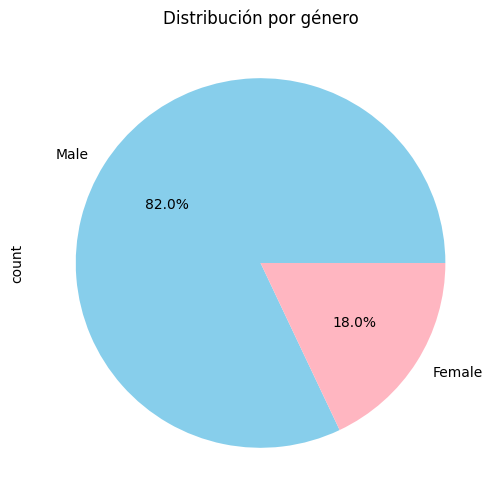

In [10]:
#Vemos la distribución por género

plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightpink'])
plt.title('Distribución por género')
plt.show()

Text(0.5, 1.0, 'Porcentaje de encuestados por fecha')

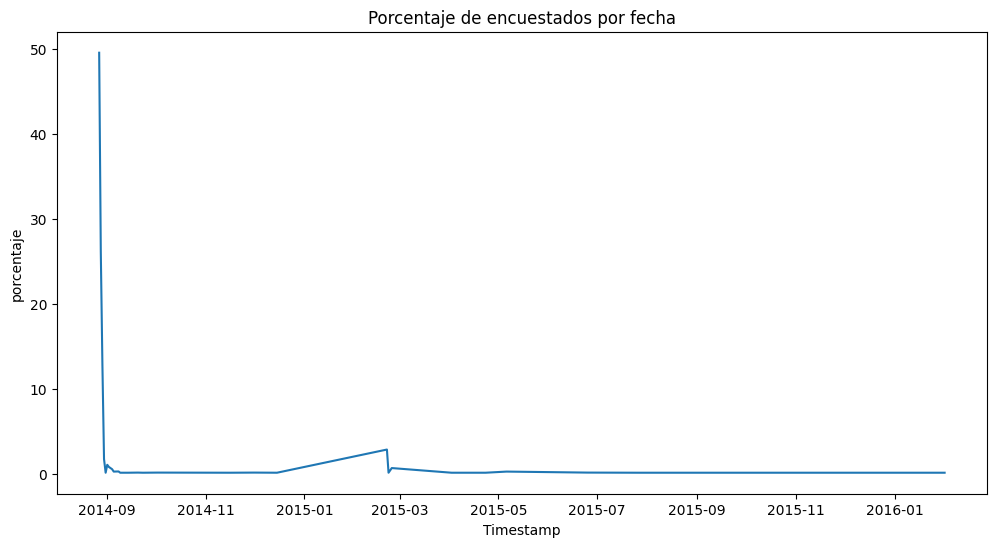

In [11]:
#Vemos cómo se distribuye la frecuencia de los datos de nuestro dataset en el tiempo
grafico_fecha = df.groupby('Timestamp').size().reset_index(name='conteo').sort_values(by='Timestamp')
grafico_fecha['porcentaje'] = (grafico_fecha['conteo'] / grafico_fecha['conteo'].sum()) * 100

plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='porcentaje', data=grafico_fecha)
plt.title('Porcentaje de encuestados por fecha')

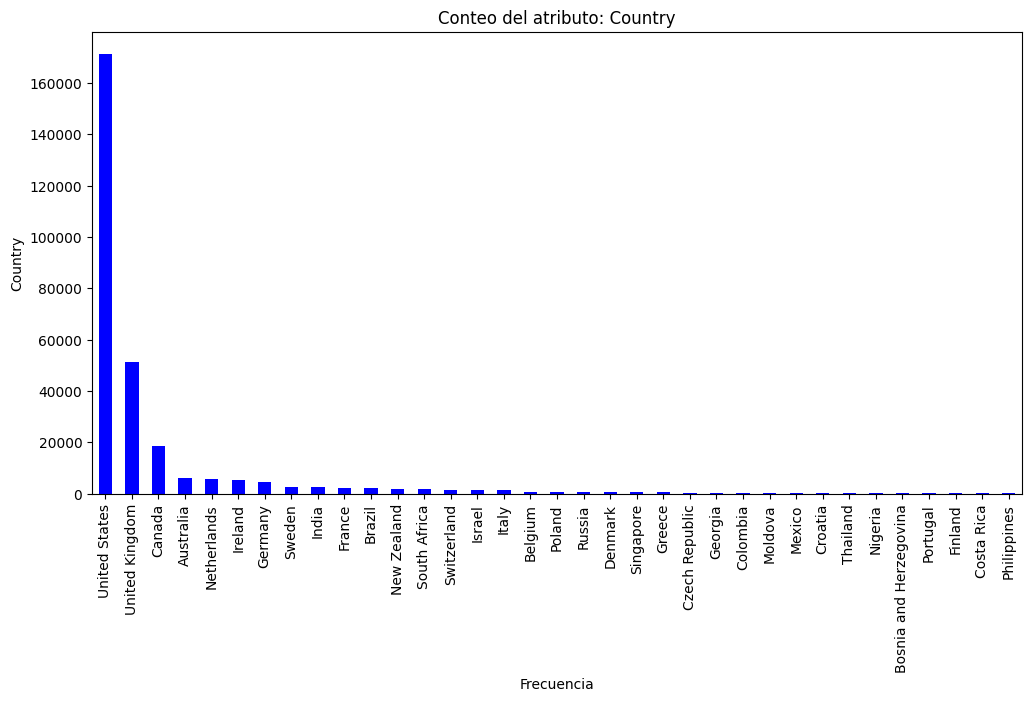

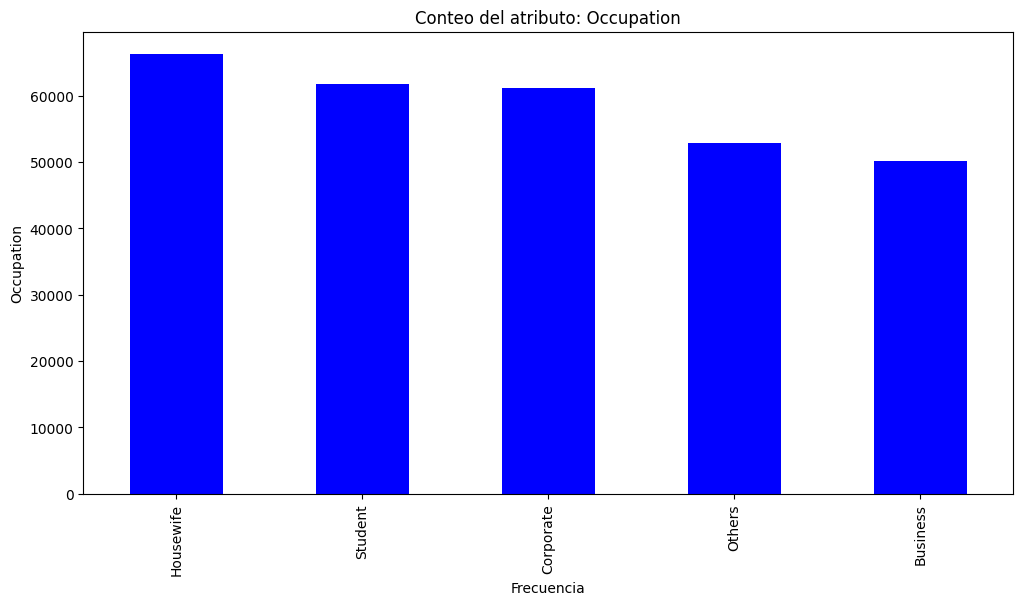

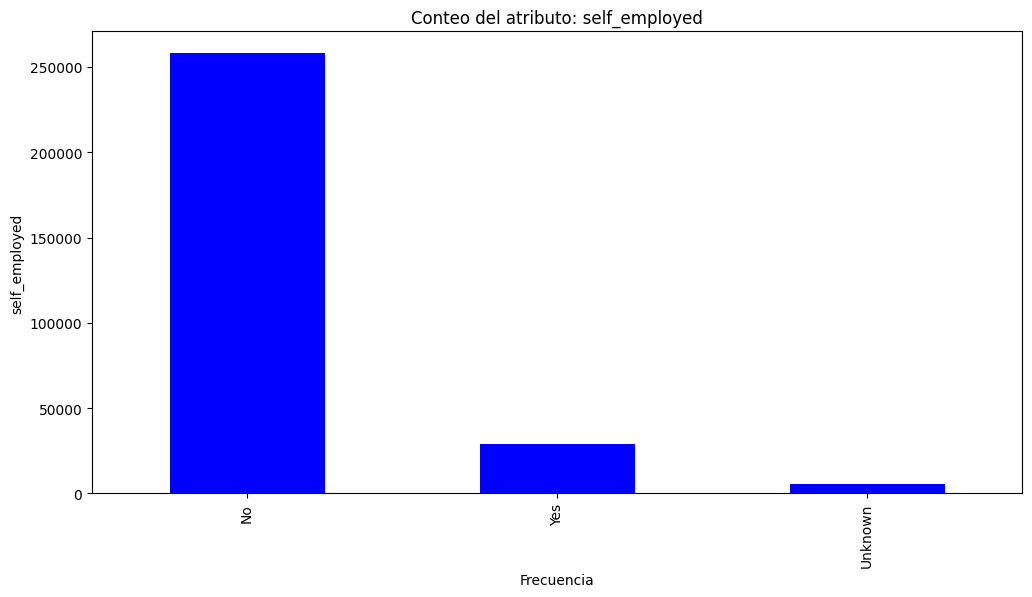

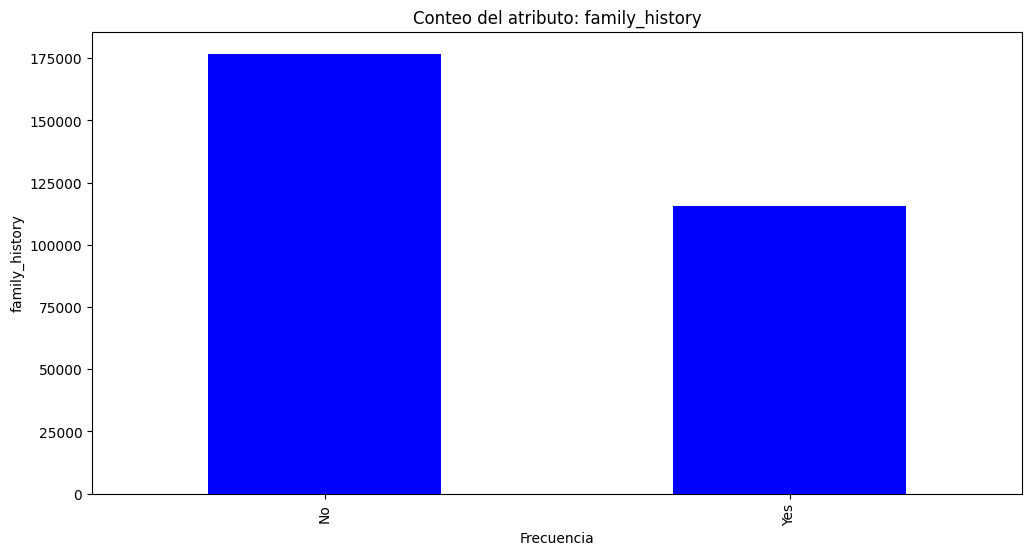

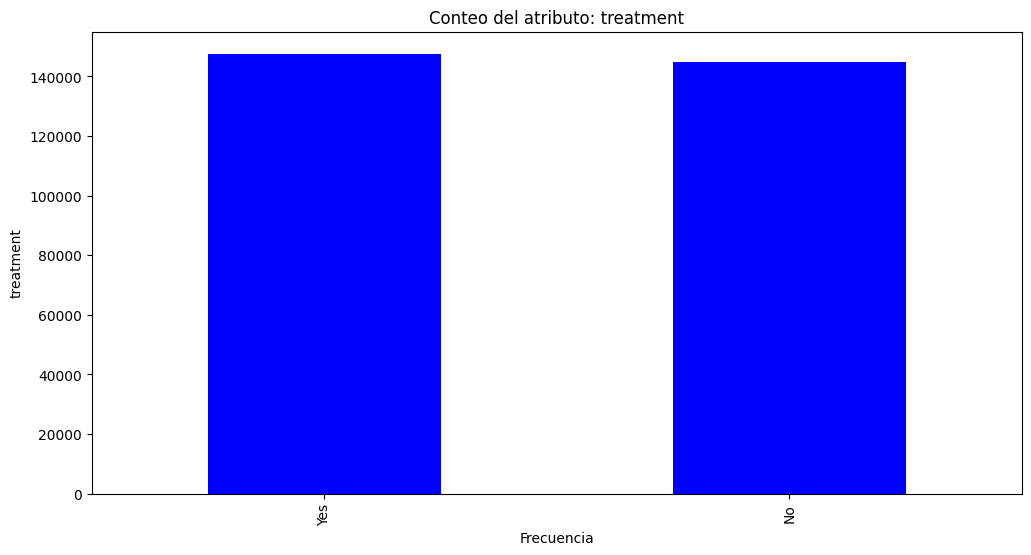

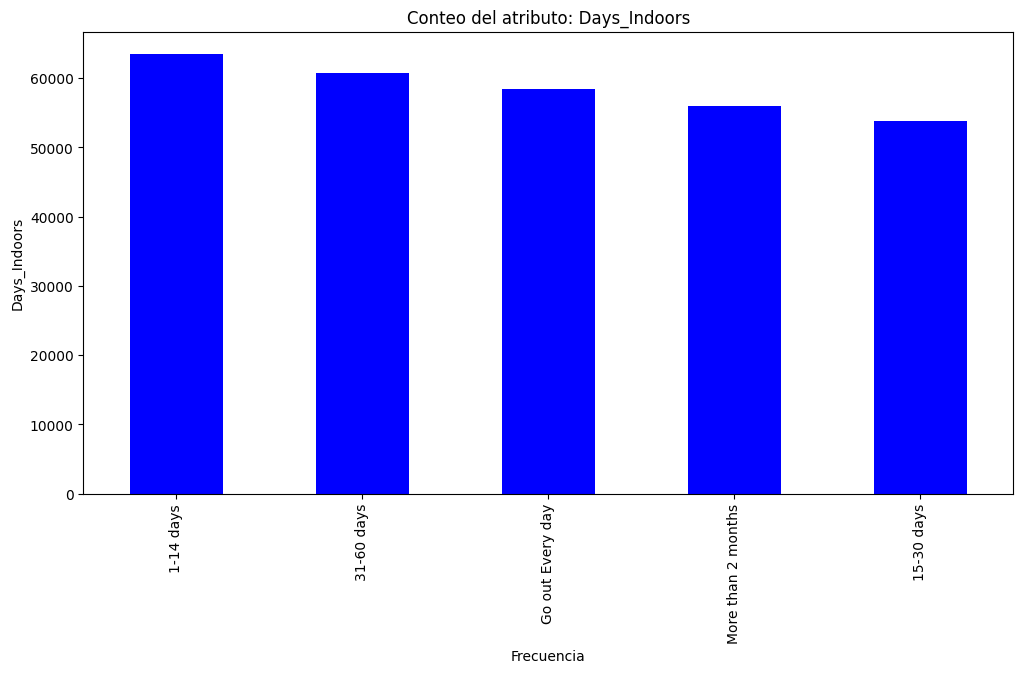

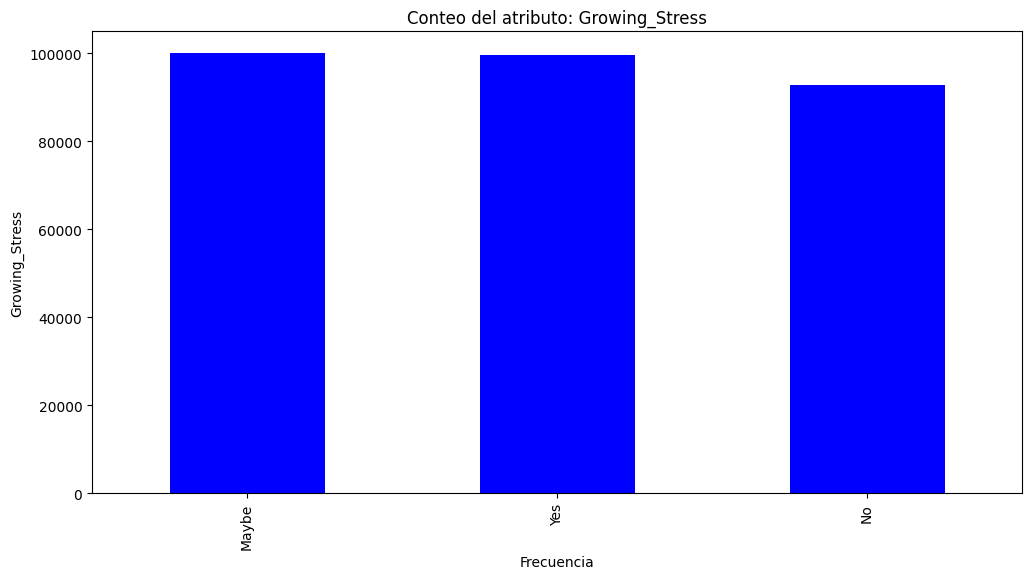

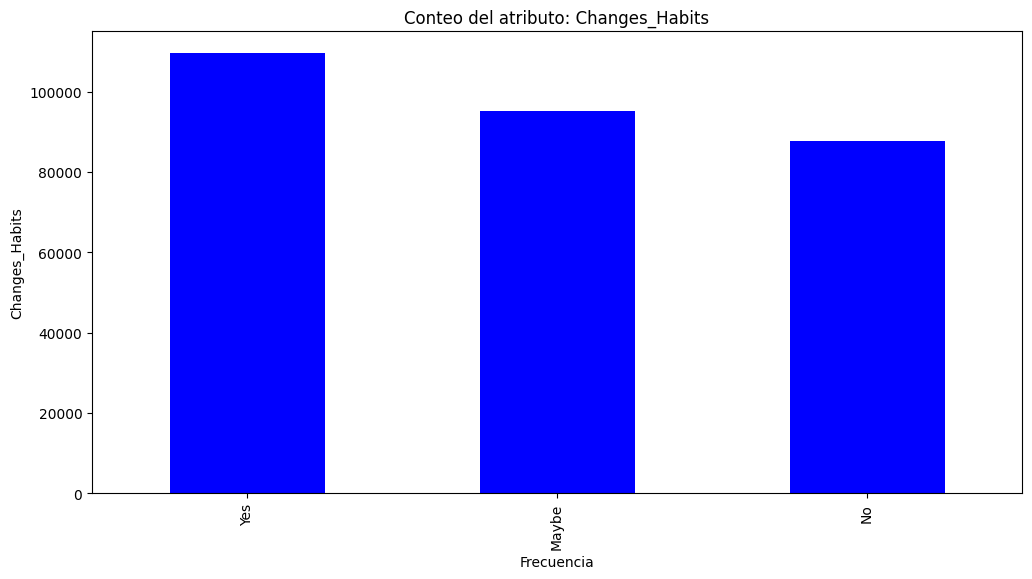

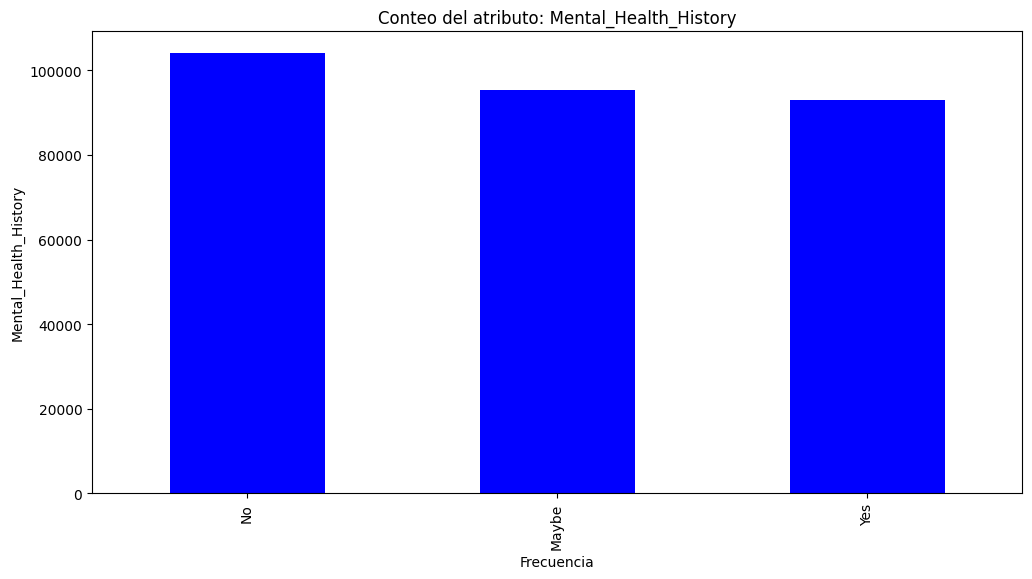

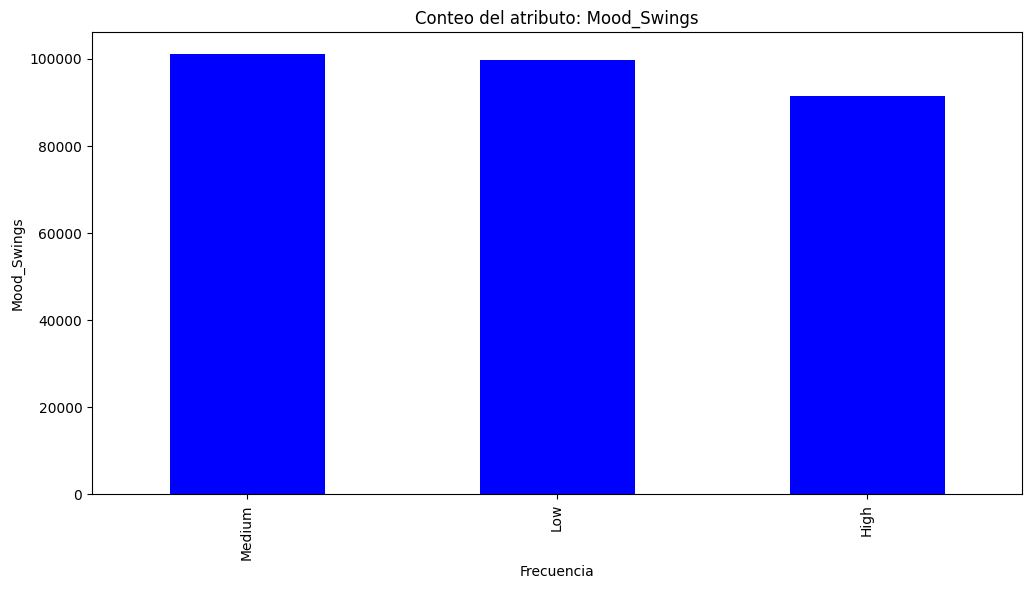

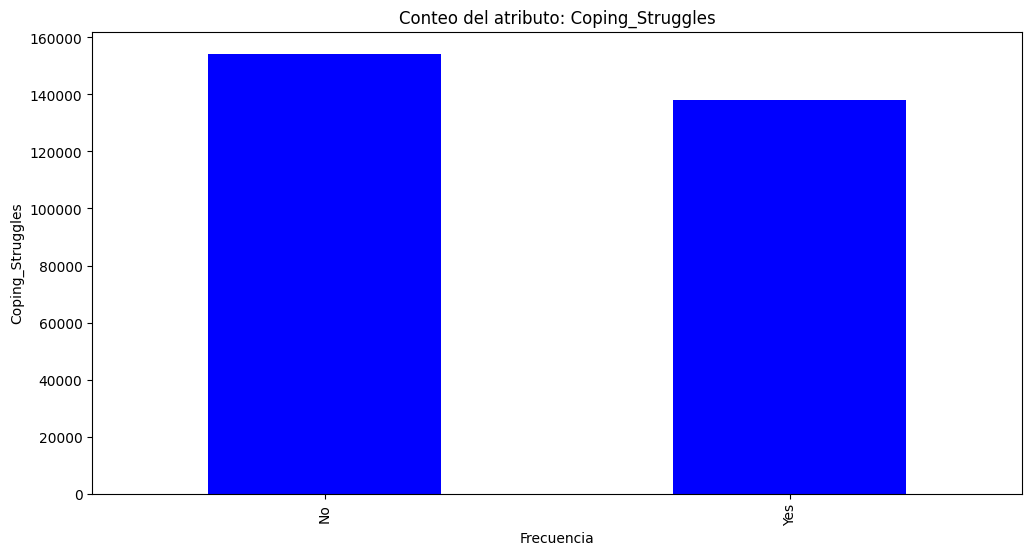

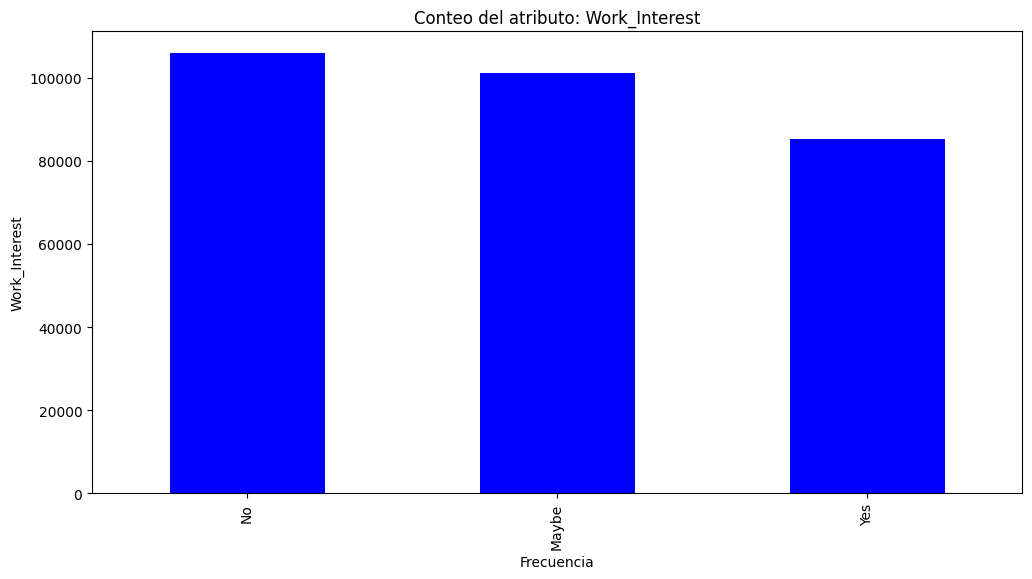

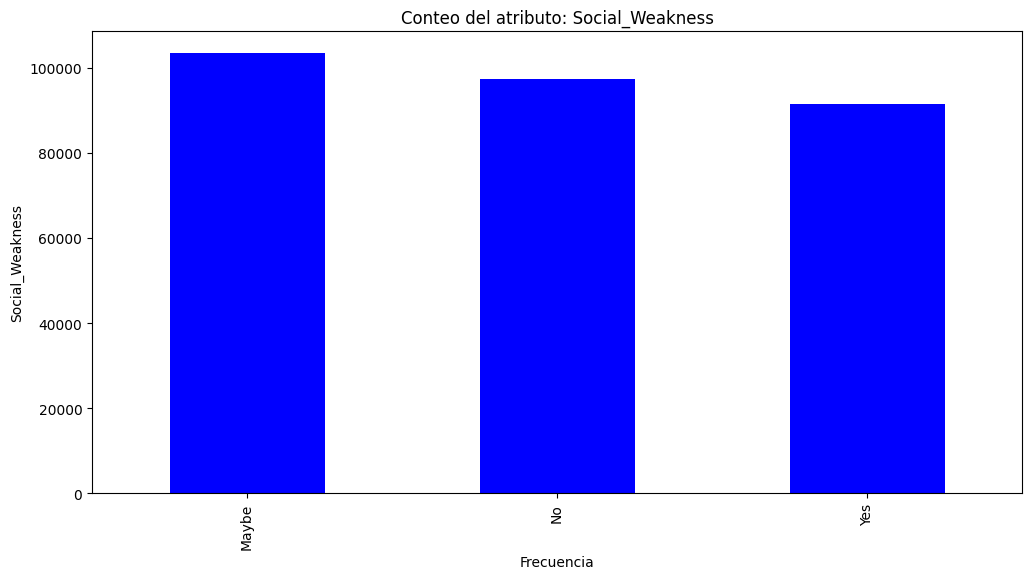

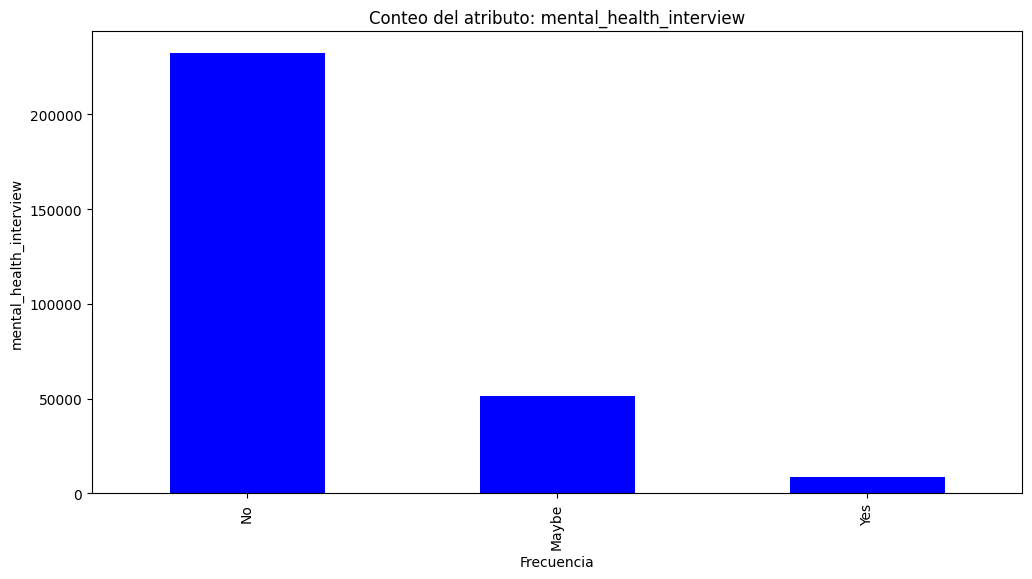

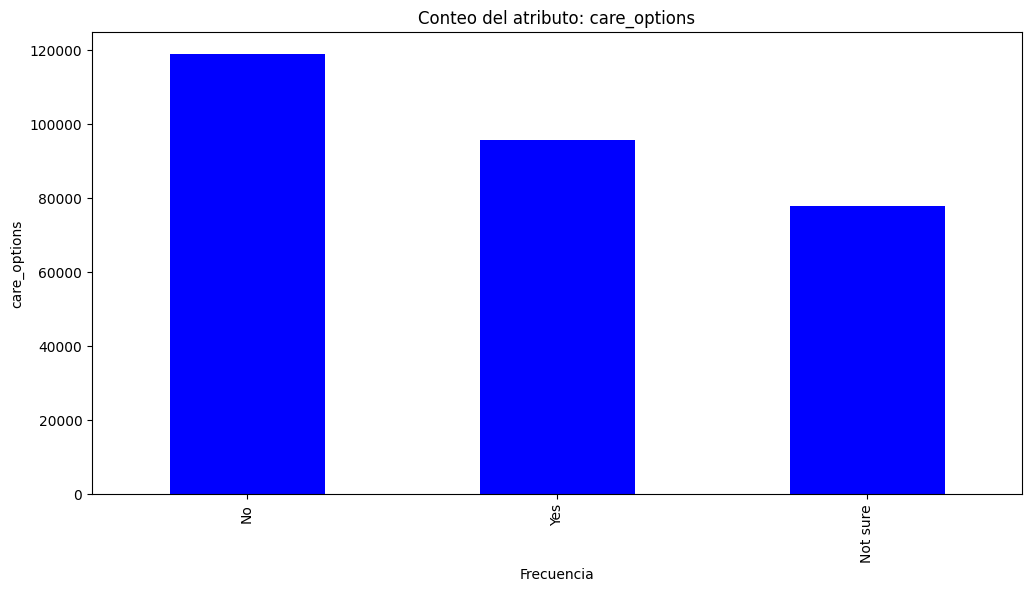

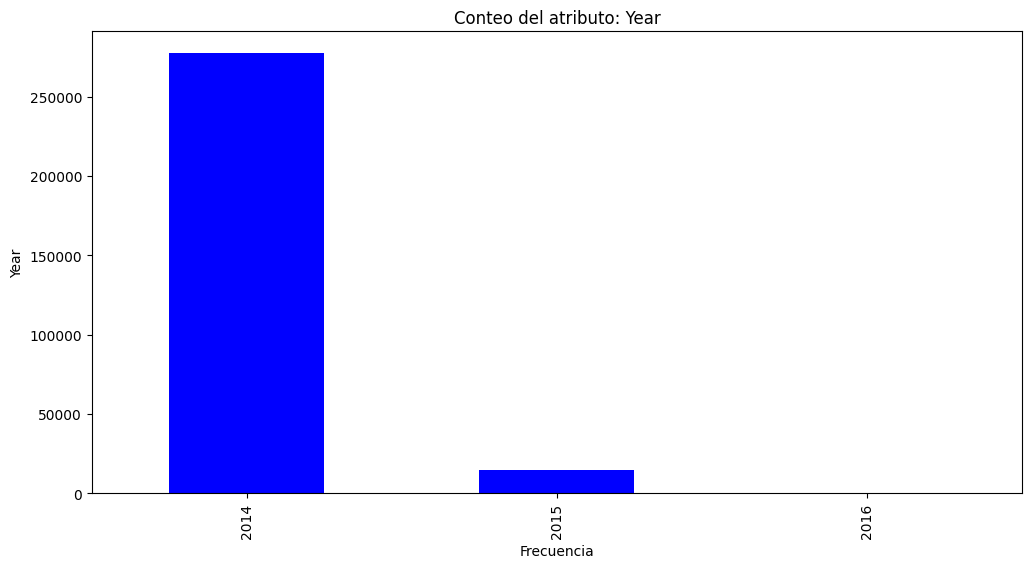

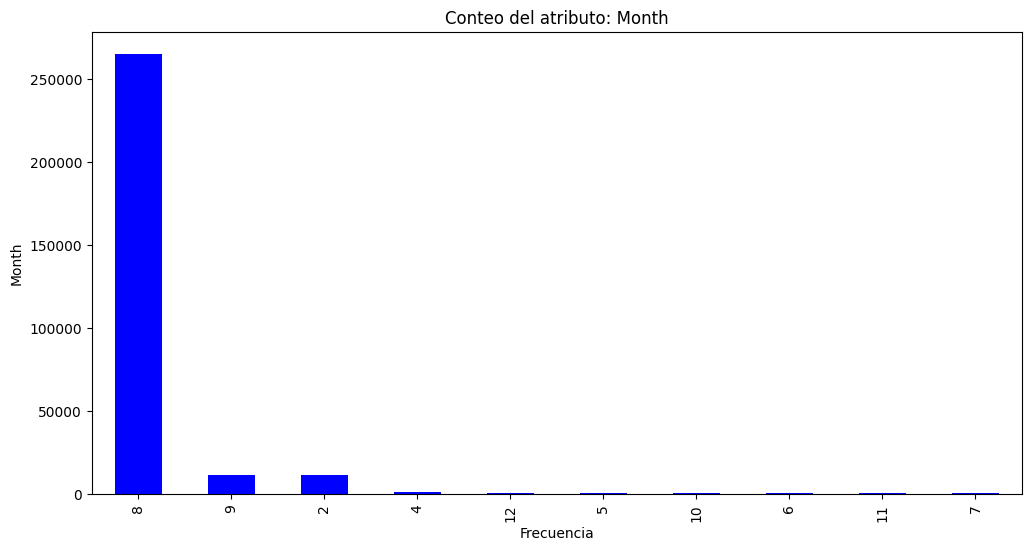

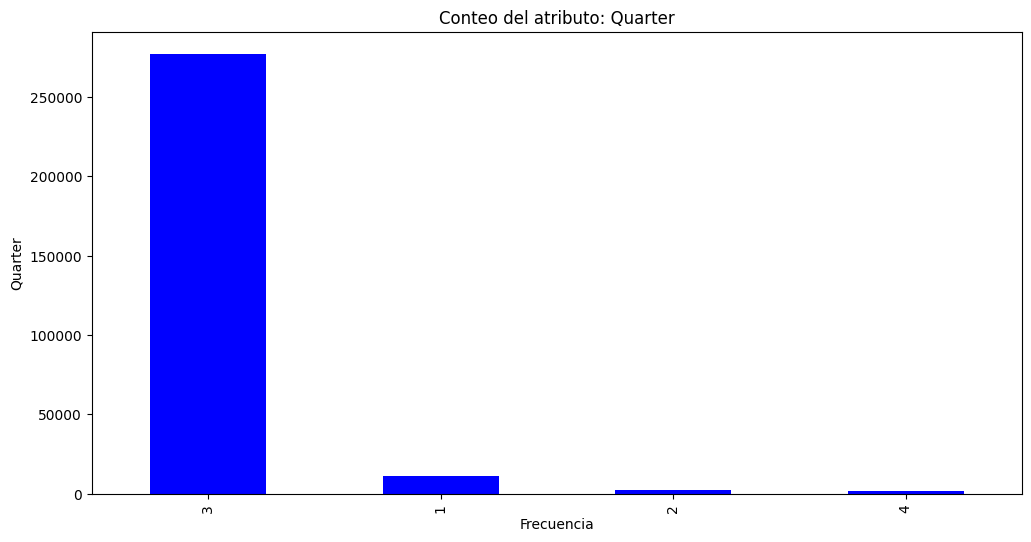

In [12]:
#Iteramos con cada dimensión para ver su distribución y tener un primer vistazo gráfico de los datos
for column in df.columns[2:]:
    plt.figure(figsize=(12, 6))
    df[column].value_counts().plot(kind='bar', color='blue')
    plt.title(f"Conteo del atributo: {column}")
    plt.xlabel("Frecuencia")
    plt.ylabel(column)
    plt.show()

##Hipótesis

Pregunta 1: ¿Existe una relación entre el nivel de estrés y los días que una persona pasa en interiores?

    Hipótesis 1: Las personas que pasan más días en interiores tienen niveles de estrés más altos.


Pregunta 2: ¿Existe una relación entre los desafíos para lidiar con la salud mental y las debilidades sociales?

    Hipótesis 2: Las personas que enfrentan desafíos para lidiar con su salud mental tienen más probabilidades de presentar debilidades sociales.


Pregunta 3: ¿La historia familiar de problemas de salud mental afecta la probabilidad de recibir tratamiento?

    Hipótesis 3: Las personas con historial familiar de problemas de salud mental tienen más probabilidades de recibir tratamiento.


Pregunta 4: ¿Existe una relación entre los cambios en los hábitos y los cambios de humor?

    Hipótesis 4: Las personas que han experimentado cambios en sus hábitos tienen más probabilidades de experimentar cambios de humor.

Growing_Stress      Maybe     No    Yes
Days_Indoors                           
1-14 days           20880  20134  22534
15-30 days          17533  17644  18652
31-60 days          18390  21233  21082
Go out Every day    21959  19126  17281
More than 2 months  21223  14589  20104


<Axes: xlabel='Days_Indoors'>

<Figure size 1000x600 with 0 Axes>

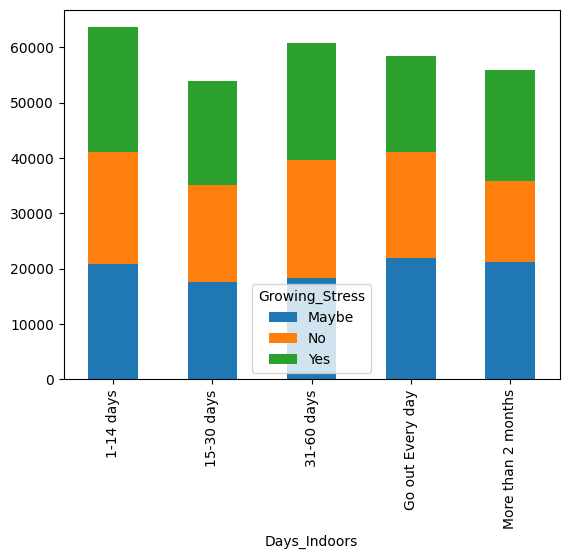

In [13]:
#Pregunta 1: ¿Existe una relación entre el nivel de estrés y los días que una persona pasa en interiores?

stress_indoors = pd.crosstab(df['Days_Indoors'], df['Growing_Stress'])
print(stress_indoors)

plt.figure(figsize=(10, 6))
stress_indoors.plot(kind='bar', stacked=True)

De acuerdo a las observaciones realizadas, la mayoría de las personas que pasan de 1 a 14 días en interiores reportan altos niveles de stress, al igual que entre 15-30 días. En la distribución del caso 31-60 días, las casos se tienden a igualar, y por encima de los 2 meses predomina altos niveles de stress.
En paralelo, se puede observar que las personas que salen todos los días tienden a reportar niveles de estrés "Maybe" más altos, y menos "Yes" comparado con los que pasan más tiempo en interiores.

Social_Weakness   Maybe     No    Yes
Coping_Struggles                     
No                56541  50915  46872
Yes               46852  46449  44735


<Axes: xlabel='Social_Weakness', ylabel='Coping_Struggles'>

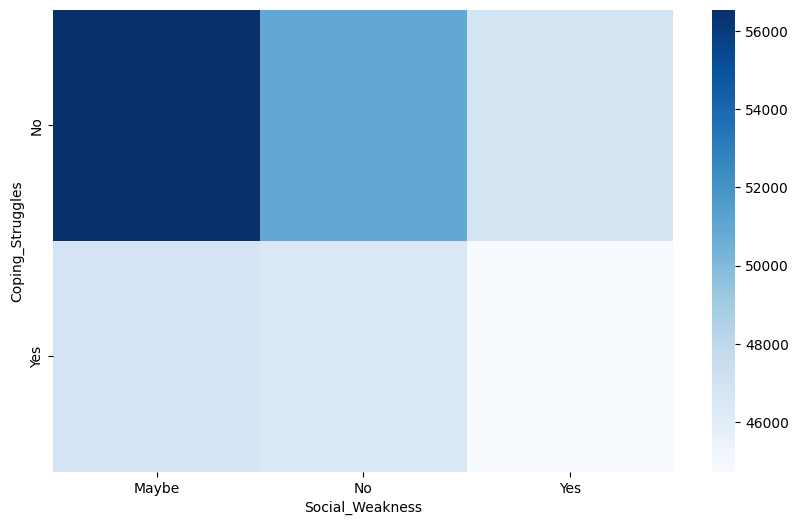

In [14]:
#Pregunta 2: ¿Existe una relación entre los desafíos para lidiar con la salud mental y las debilidades sociales?
coping_social = pd.crosstab(df['Coping_Struggles'], df['Social_Weakness'])
print(coping_social)

plt.figure(figsize=(10, 6))
sns.heatmap(coping_social, annot=False, cmap='Blues')

De lo observado se puede concluir que las personas que tienen desafíos para lidiar con la salud mental también reportan más debilidades sociales "Maybe", de igual manera que los que no.

  family_history treatment  Frecuencia
0             No        No      113766
1             No       Yes       63066
2            Yes        No       30992
3            Yes       Yes       84540


<Axes: xlabel='treatment', ylabel='family_history'>

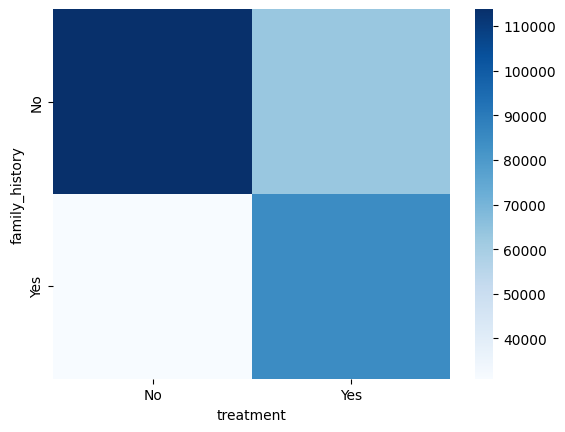

In [15]:
#Pregunta 3: ¿La historia familiar de problemas de salud mental afecta la probabilidad de recibir tratamiento?
frecuencias = df.groupby(['family_history', 'treatment']).size().reset_index(name='Frecuencia')
print(frecuencias)

sns.heatmap(frecuencias.pivot(index='family_history', columns='treatment', values='Frecuencia'), annot=False, cmap='Blues')

Acá la determinación fue más marcada. La mayoría de las personas con historia familiar de problemas de salud mental eligen recibir tratamiento, en contraste con las que no.

Mood_Swings      High    Low  Medium
Changes_Habits                      
Maybe           35187  30912   29067
No              25871  29672   32132
Yes             30408  39250   39865


<Axes: xlabel='Mood_Swings', ylabel='Changes_Habits'>

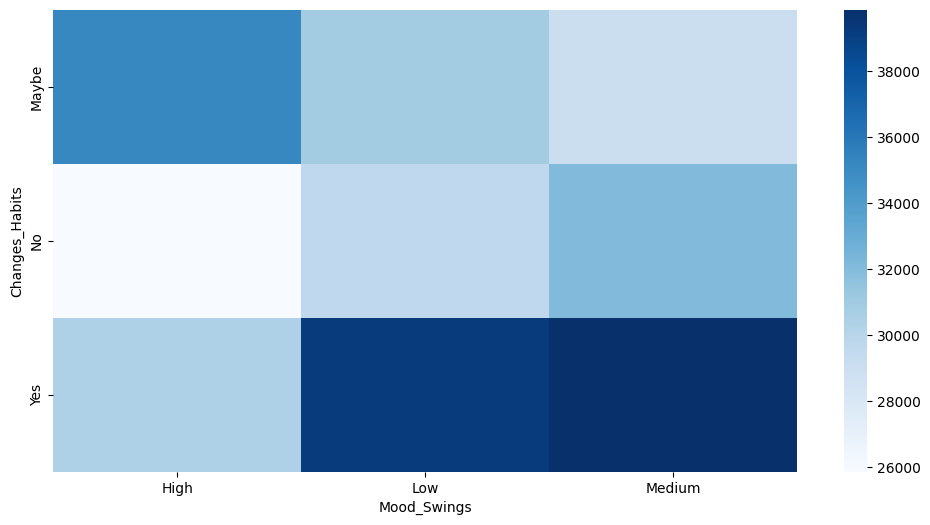

In [16]:
#Hipótesis 4 : ¿Existe una relación entre los cambios en los hábitos y los cambios de humor?
changes_mood = pd.crosstab(df['Changes_Habits'], df['Mood_Swings'])
print(changes_mood)

plt.figure(figsize=(12, 6))
sns.heatmap(changes_mood, annot=False, cmap='Blues')

Se puede concluir por lo expuesto que la mayoría de las personas que han experimentado cambios en los hábitos indican tener cambios de humor "High", mientras que la mayoría de las personas que no han experimentado cambios en los hábitos indican tener cambios de humor "Medium", seguido por "Low" y finalmente "High".

##Preprocesamiento

Al ser todas las variables categóricas, se impone convertirlas a formato numérico antes de modelar. Del análisis previo se considera que la opción más segura es One-Hot Encoding, sobre todo para evitar relaciones artificiales de ordinalidad y mejorar el rendimiento, ya que las variables no tienen muchas categorías (pudiendo llevar a problemas de memoria y sobreajuste).

En paralelo se quitará del modelo las variables 'country' y 'Timestamp', las que no son requeridas para trabajar en las hipótesis anteriormente mencionadas.

In [19]:
#Hacemos One-Hot Encoding para modificar las variables categóricas

#df.columns
df_dummiado = pd.get_dummies(df, columns=df.columns[3:-3])
#df_dummiado.head()

# Removemos las variables sin interés.
df_dummiado.drop(['Timestamp', 'Gender', 'Country', 'Year', 'Month', 'Quarter',], axis=1, inplace=True)
df_dummiado.columns
#df_dummiado.head()

Index(['Occupation_Business', 'Occupation_Corporate', 'Occupation_Housewife',
       'Occupation_Others', 'Occupation_Student', 'self_employed_No',
       'self_employed_Unknown', 'self_employed_Yes', 'family_history_No',
       'family_history_Yes', 'treatment_No', 'treatment_Yes',
       'Days_Indoors_1-14 days', 'Days_Indoors_15-30 days',
       'Days_Indoors_31-60 days', 'Days_Indoors_Go out Every day',
       'Days_Indoors_More than 2 months', 'Growing_Stress_Maybe',
       'Growing_Stress_No', 'Growing_Stress_Yes', 'Changes_Habits_Maybe',
       'Changes_Habits_No', 'Changes_Habits_Yes',
       'Mental_Health_History_Maybe', 'Mental_Health_History_No',
       'Mental_Health_History_Yes', 'Mood_Swings_High', 'Mood_Swings_Low',
       'Mood_Swings_Medium', 'Coping_Struggles_No', 'Coping_Struggles_Yes',
       'Work_Interest_Maybe', 'Work_Interest_No', 'Work_Interest_Yes',
       'Social_Weakness_Maybe', 'Social_Weakness_No', 'Social_Weakness_Yes',
       'mental_health_interview_Ma

##Feature selection y modelado

Como estrategia, para la etapa de modelado se ha decidido modelar cada hipótesis por separado. Cada modelo tendrá una variable dependiente específica que intenta predecir o explicar. Veamos cada una de las hipótesis:

Hipótesis 1: Las personas que pasan más días en interiores tienen niveles de estrés más altos.

*   Variable Dependiente: Growing_Stress (nivel de estrés).
*   Variable Independiente: Days_Indoors (días que pasa en interiores).


Hipótesis 2: Las personas que enfrentan desafíos para lidiar con su salud mental tienen más probabilidades de presentar debilidades sociales.


*   Variable Dependiente: Social_Weakness (debilidades sociales).
*   Variable Independiente: Coping_Struggles (desafíos para lidiar con la salud mental).


Hipótesis 3: Las personas con historial familiar de problemas de salud mental tienen más probabilidades de recibir tratamiento.


*   Variable Dependiente: Treatment (recepción de tratamiento).
*   Variable Independiente: Family_history (historial familiar de problemas de salud mental).


Hipótesis 4: Las personas que han experimentado cambios en sus hábitos tienen más probabilidades de experimentar cambios de humor.

*   Variable Dependiente: Mood_Swings (cambios de humor).
*   Variable Independiente: Changes_Habits (cambios en los hábitos).









Librerias necesarias

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


HIPOTESIS 1

In [54]:
# Seleccionamos las variables relevantes
X = df[['Days_Indoors']]
y = df['Growing_Stress']

# Usamos OneHotEncoder para convertir las categorías de 'Days_Indoors' en variables dummy
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()

# Convertimos 'y' a valores numéricos usando label encoding dentro de LogisticRegression (automático)

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, shuffle=True)

In [55]:
# Instanciamos el modelo de regresión logística
log_reg = LogisticRegression(multi_class='ovr', max_iter=1000)

# Entrenamos el modelo
log_reg.fit(X_train, y_train)

# Realizamos predicciones
y_pred = log_reg.predict(X_test)

In [56]:
# Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy}')
print('Reporte de clasificación:')
print(report)

Precisión del modelo: 0.36139550792383995
Reporte de clasificación:
              precision    recall  f1-score   support

       Maybe       0.38      0.43      0.40     29954
          No       0.35      0.23      0.28     27818
         Yes       0.35      0.42      0.38     29938

    accuracy                           0.36     87710
   macro avg       0.36      0.36      0.35     87710
weighted avg       0.36      0.36      0.36     87710



La precisión general del modelo, de las variables y el recall son similares, y todas están por debajo del 0.50 (rondan entre 0.35 y 0.38), lo que indica que el modelo tiene dificultades para distinguir entre las clases "yes", "no" y "maybe".
El f1-score también es bajo, lo que sugiere que el modelo está cometiendo tanto errores de precisión (falsos positivos) como errores de recall (falsos negativos).

Se va a considerar otro modelo de clasificación: Random Forest con ajuste de peso de clases.

In [57]:
# Definimos las variables independientes y la variable dependiente
X = df_dummiado[['Days_Indoors_1-14 days', 'Days_Indoors_15-30 days',
                 'Days_Indoors_31-60 days', 'Days_Indoors_Go out Every day',
                 'Days_Indoors_More than 2 months']]
y = df_dummiado['Growing_Stress_Yes']

# Nuevamente, dividimos el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Instanciamos el modelo RandomForestClassifier con pesos ajustados
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Entrenamos el modelo
rf_classifier.fit(X_train, y_train)

# Realizamos predicciones
y_pred = rf_classifier.predict(X_test)

# Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.4207159958955649
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.70      0.21      0.32     57772
        True       0.35      0.83      0.49     29938

    accuracy                           0.42     87710
   macro avg       0.53      0.52      0.41     87710
weighted avg       0.58      0.42      0.38     87710



La precisión general mejora un poco (0.42). El modelo detecta bien los casos negativos (False), pero con un bajo recall, lo que indica que está perdiendo muchos casos positivos (True). Y tiene un buen recall para la clase True, pero la precisión es baja, lo que indica que muchos casos que el modelo clasifica como True en realidad son falsos positivos.

HIPOTESIS 2

In [62]:
# Definimos las variables independientes y la variable dependiente
X = df_dummiado[['Coping_Struggles_No', 'Coping_Struggles_Yes']]
y = df_dummiado['Social_Weakness_Yes']

# Nuevamente, dividimos el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Instanciamos el modelo RandomForestClassifier con pesos ajustados
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Entrenamos el modelo
rf_classifier.fit(X_train, y_train)

# Realizamos predicciones
y_pred = rf_classifier.predict(X_test)

# Evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.5187435868202029
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.69      0.53      0.60     60122
        True       0.32      0.49      0.39     27588

    accuracy                           0.52     87710
   macro avg       0.51      0.51      0.50     87710
weighted avg       0.58      0.52      0.54     87710



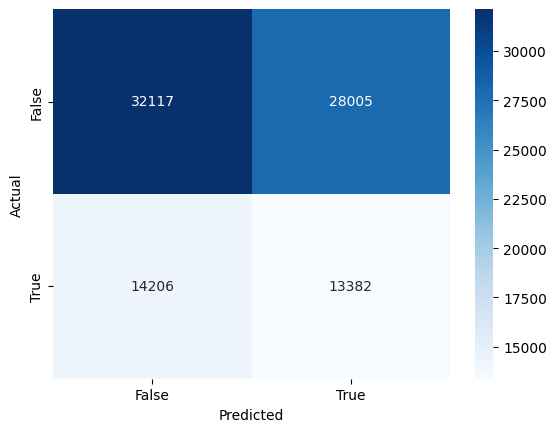

In [63]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

El modelo está clasificando correctamente aproximadamente la mitad de las observaciones en promedio (0.51). De todas maneras la precisión para la clase 'True' sigue siendo bajo. Esto sugiere que el modelo tiene dificultades para identificar correctamente las instancias de esta clase, que parece ser menos frecuente en comparación con la clase 'False'.

HIPOTESIS 3

Precisión del modelo: 0.6789875726827044
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.64      0.79      0.71     43529
        True       0.73      0.57      0.64     44181

    accuracy                           0.68     87710
   macro avg       0.69      0.68      0.68     87710
weighted avg       0.69      0.68      0.68     87710



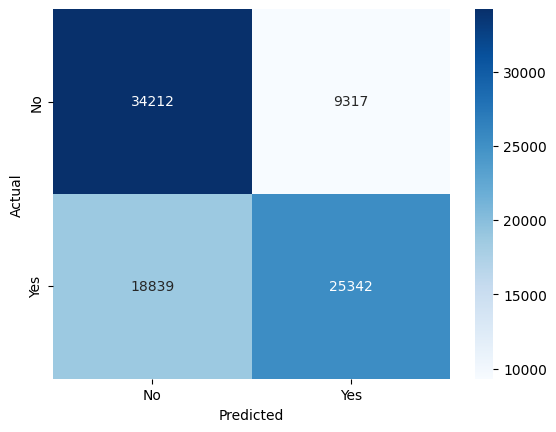

In [64]:
X = df_dummiado[['family_history_No', 'family_history_Yes']]
y = df_dummiado['treatment_Yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

El modelo clasifica correctamente el 68% de las muestras en el conjunto de prueba. Muestra un buen equilibrio en cuanto a la clasificación de las dos clases. Aunque la precisión y el recall para la clase "True" (recibir tratamiento) son más bajos en comparación con "False", el modelo está equilibrado en términos de precisión general.

HIPOTESIS 4

In [70]:
X = df_dummiado[['Changes_Habits_Maybe', 'Changes_Habits_No', 'Changes_Habits_Yes']]
y = df_dummiado[['Mood_Swings_High']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Instanciamos el modelo RandomForestClassifier con pesos ajustados
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0:1, 1:15})

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Precisión del modelo: 0.3117888496180595
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00     60363
        True       0.31      1.00      0.48     27347

    accuracy                           0.31     87710
   macro avg       0.16      0.50      0.24     87710
weighted avg       0.10      0.31      0.15     87710



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


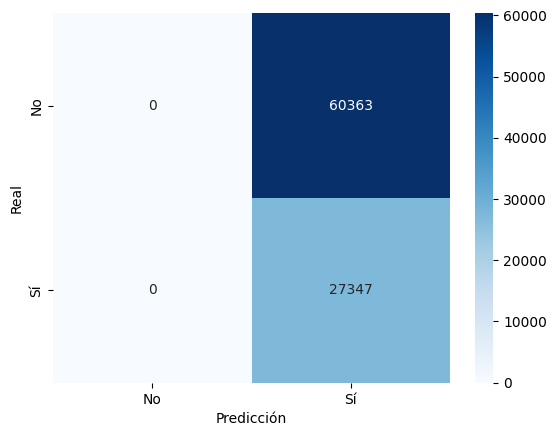

In [69]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [74]:
#Ajustado con Peso de Clases Moderado y SMOTE
from imblearn.over_sampling import SMOTE

X = df_dummiado[['Changes_Habits_Maybe', 'Changes_Habits_No', 'Changes_Habits_Yes']].astype(int)
y = df_dummiado['Mood_Swings_High'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Sobremuestreamos de la clase minoritaria
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Instanciamos el modelo RandomForestClassifier con pesos ajustados
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

rf_classifier.fit(X_resampled, y_resampled)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.6002508265876183
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71     60363
           1       0.37      0.38      0.37     27347

    accuracy                           0.60     87710
   macro avg       0.54      0.54      0.54     87710
weighted avg       0.61      0.60      0.60     87710



La precisión general del modelo es del 60.0%, lo que indica que el modelo está haciendo un buen trabajo en general, pero todavía hay margen para mejorar, especialmente en la predicción de la clase minoritaria (cambios de humor).La precisión para la clase 1 es del 37%, lo que sugiere que el modelo es menos preciso cuando predice cambios de humor. La precisión para la clase 0 es del 71%, lo que significa que cuando el modelo predice que no hay cambios de humor, es correcto el 71% de las veces.

##Conclusiones

En resumen, mientras que los modelos aplicados han proporcionado una visión general de las hipótesis, los resultados sugieren que hay margen para mejorar, especialmente en la detección de clases minoritarias. La experimentación continua y el ajuste de técnicas serán clave para lograr un rendimiento óptimo.

Desbalance de Clases: En muchos casos, el desbalance entre las clases ha afectado el rendimiento del modelo. Técnicas como el ajuste de pesos de clases y SMOTE fueron útiles, pero se podría considerar la experimentación con otros métodos de balanceo o la aplicación de modelos más avanzados.

Evaluación del Modelo: La precisión, el recall y el F1-score son métricas útiles, pero en presencia de desbalance de clases, también es importante considerar métricas adicionales para obtener una visión más completa del rendimiento del modelo.

Mejoras Potenciales: Ajustar los hiperparámetros del modelo, experimentar con diferentes algoritmos de clasificación y utilizar técnicas avanzadas como el boosting podrían mejorar aún más los resultados. Además, realizar una revisión más exhaustiva de la preprocesamiento de datos y la selección de características también podría tener un impacto positivo en el rendimiento del modelo.